In [16]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Cấu hình đường dẫn
DATA_DIR = '../data/split_data'
MODEL_PATH = '../model/logistic_model.pkl'

print(" Đang tải dữ liệu Test...")
try:
    X_test = pd.read_csv(f'{DATA_DIR}/X_test.csv')
    y_test = pd.read_csv(f'{DATA_DIR}/y_test.csv')
    print(f" Đã tải xong tập Test: {X_test.shape} mẫu.")
except FileNotFoundError:
    print(" Không tìm thấy file dữ liệu Test.")

 Đang tải dữ liệu Test...
 Đã tải xong tập Test: (86, 30) mẫu.


In [17]:
print(" Đang tải mô hình...")

try:
    # Load mô hình từ file
    model = joblib.load(MODEL_PATH)
    print(" Đã load thành công mô hình Logistic Regression.")
except FileNotFoundError:
    print(" Không tìm thấy file mô hình (.pkl). Vui lòng chạy bước Training trước.")

 Đang tải mô hình...
 Đã load thành công mô hình Logistic Regression.


In [18]:
print(" Đang chạy dự đoán trên tập Test...")

# 1. Dự đoán
y_pred_test = model.predict(X_test)

# 2. Tính độ chính xác
acc_test = accuracy_score(y_test, y_pred_test)
print(f"\n ĐỘ CHÍNH XÁC TRÊN TẬP TEST: {acc_test:.4f} ({acc_test*100:.2f}%)")

# 3. Báo cáo chi tiết
print("\n Báo cáo chi tiết (Classification Report):")
print(classification_report(y_test, y_pred_test, target_names=['Lành tính (0)', 'Ác tính (1)']))

 Đang chạy dự đoán trên tập Test...

 ĐỘ CHÍNH XÁC TRÊN TẬP TEST: 0.9884 (98.84%)

 Báo cáo chi tiết (Classification Report):
               precision    recall  f1-score   support

Lành tính (0)       0.98      1.00      0.99        54
  Ác tính (1)       1.00      0.97      0.98        32

     accuracy                           0.99        86
    macro avg       0.99      0.98      0.99        86
 weighted avg       0.99      0.99      0.99        86



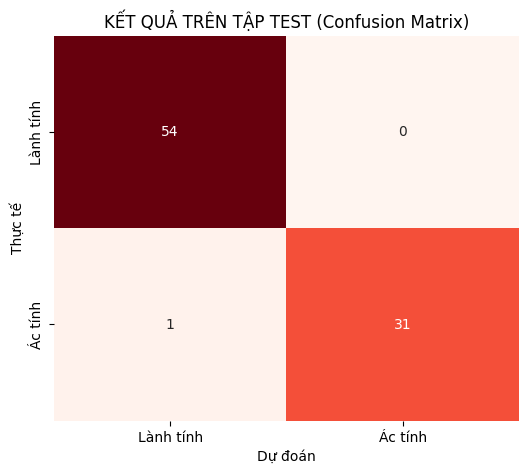

In [19]:
# Tính ma trận nhầm lẫn
cm_test = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Reds', cbar=False, 
            xticklabels=['Lành tính', 'Ác tính'],
            yticklabels=['Lành tính', 'Ác tính'])
plt.title('KẾT QUẢ TRÊN TẬP TEST (Confusion Matrix)')
plt.ylabel('Thực tế')
plt.xlabel('Dự đoán')
plt.show()